In [8]:
# --- 第 1 部分 ---
# 載入函式庫與資料集
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

np.random.seed(123456)
data = pd.read_csv('../Data/creditcard.csv')
data.Time = (data.Time-data.Time.min())/data.Time.std()
data.Amount = (data.Amount
               - data.Amount.mean()) / data.Amount.std()
print(data.head())

# 把資料分為 70% 訓練資料集與 30% 測試資料集
x_train, x_test, y_train, y_test = train_test_split(
    data.drop('Class', axis=1).values, 
    data.Class.values, 
    test_size=0.3)


       Time        V1        V2        V3        V4        V5        V6  \
0  0.000000 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1  0.000000  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2  0.000021 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3  0.000021 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4  0.000042 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [9]:
type(data.drop('Class', axis=1).values)

numpy.ndarray

In [11]:
data.drop('Class', axis=1).values.shape

(284807, 30)

In [10]:
type(data.Class.values)

numpy.ndarray

In [13]:
data.Class.values.shape

(284807,)

In [19]:
# --- 第 2 部分 ---
# 訓練基學習器
base_classifiers = [('DT', DecisionTreeClassifier(max_depth = 3)),    # 決策樹 限制最大深度為3
                    ('NB', GaussianNB()),                             # 單純貝式分類器  
                    ('LR', LogisticRegression(solver = 'liblinear'))] # 邏輯斯迴歸

for bc in base_classifiers:
    lr = bc[1]
    lr.fit(x_train, y_train)

    predictions = lr.predict(x_test)
    print(bc[0]+' f1', metrics.f1_score(y_test, predictions))         #  F1分數
    print(bc[0]+' recall', metrics.recall_score(y_test, predictions)) #  召回率
    print(metrics.confusion_matrix(y_test, predictions))
    print()


DT f1 0.7600000000000001
DT recall 0.6985294117647058
[[85288    19]
 [   41    95]]

NB f1 0.10743405275779377
NB recall 0.8235294117647058
[[83470  1837]
 [   24   112]]

LR f1 0.7510917030567685
LR recall 0.6323529411764706
[[85300     7]
 [   50    86]]



In [20]:
data.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


In [21]:
data.corr()['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Class     1.000000
Name: Class, dtype: float64

In [22]:
data.corr()['Class'].drop('Class')

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

In [24]:
type(data.corr()['Class'].drop('Class').sort_values())

pandas.core.series.Series

In [23]:
data.corr()['Class'].drop('Class').sort_values()

V17      -0.326481
V14      -0.302544
V12      -0.260593
V10      -0.216883
V16      -0.196539
V3       -0.192961
V7       -0.187257
V18      -0.111485
V1       -0.101347
V9       -0.097733
V5       -0.094974
V6       -0.043643
Time     -0.012323
V24      -0.007221
V13      -0.004570
V15      -0.004223
V23      -0.002685
V22       0.000805
V25       0.003308
V26       0.004455
Amount    0.005632
V28       0.009536
V27       0.017580
V8        0.019875
V20       0.020090
V19       0.034783
V21       0.040413
V2        0.091289
V4        0.133447
V11       0.154876
Name: Class, dtype: float64

Text(0.5, 1.0, 'Correlations to Class')

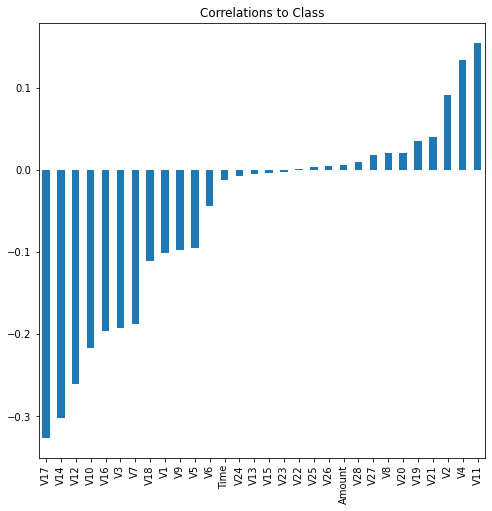

In [3]:
# --- 第 3 部分 ---
# 檢查特徵與標籤的相關性
plt.figure(figsize = (8, 8))
correlations = data.corr()['Class'].drop('Class')
correlations.sort_values().plot(kind = 'bar')
plt.title('Correlations to Class')

In [25]:
correlations

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Amount    0.005632
Name: Class, dtype: float64

In [26]:
threshold = 0.1

In [28]:
abs(correlations)> threshold

Time      False
V1         True
V2        False
V3         True
V4         True
V5        False
V6        False
V7         True
V8        False
V9        False
V10        True
V11        True
V12        True
V13       False
V14        True
V15       False
V16        True
V17        True
V18        True
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Name: Class, dtype: bool

In [29]:
[abs(correlations)> threshold]

[Time      False
 V1         True
 V2        False
 V3         True
 V4         True
 V5        False
 V6        False
 V7         True
 V8        False
 V9        False
 V10        True
 V11        True
 V12        True
 V13       False
 V14        True
 V15       False
 V16        True
 V17        True
 V18        True
 V19       False
 V20       False
 V21       False
 V22       False
 V23       False
 V24       False
 V25       False
 V26       False
 V27       False
 V28       False
 Amount    False
 Name: Class, dtype: bool]

In [30]:
type([abs(correlations)> threshold])

list

In [34]:
correlations[(abs(correlations)> threshold)].index.values

array(['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17',
       'V18'], dtype=object)

In [35]:
threshold = 0.1

correlations = data.corr()['Class'].drop('Class')
fs = list(correlations[(abs(correlations)
                        > threshold)].index.values)
fs.append('Class')

In [36]:
type(fs)

list

In [37]:
fs

['V1',
 'V3',
 'V4',
 'V7',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'Class']

In [38]:
data[fs]

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,-1.359807,2.536347,1.378155,0.239599,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0
1,1.191857,0.166480,0.448154,-0.078803,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,0
2,-1.358354,1.773209,0.379780,0.791461,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,0
3,-0.966272,1.792993,-0.863291,0.237609,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,0
4,-1.158233,1.548718,0.403034,0.592941,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0
...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,-9.834783,-2.066656,-4.918215,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,0
284803,-0.732789,2.035030,-0.738589,0.024330,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,0
284804,1.919565,-3.249640,-0.557828,-0.296827,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,0
284805,-0.240440,0.702510,0.689799,-0.686180,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,0


# 去除相關性的絕對值低於0.1的特徵，看看基學習器是否能夠更有效地檢測詐騙交易

In [40]:
# --- 第 4 部分 ---
# 根據與標籤的相關性篩選特徵
threshold = 0.1

correlations = data.corr()['Class'].drop('Class')
fs = list(correlations[(abs(correlations)
                        > threshold)].index.values) # 使用fs儲存相關性大於閥值(0.1)的特徵名稱
fs.append('Class')
data = data[fs]

x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(data.drop('Class', axis=1).values, 
                                                            data.Class.values, 
                                                            test_size=0.3)

# 訓練基學習器
base_classifiers = [('DT', DecisionTreeClassifier(max_depth = 3)),    # 決策樹 限制最大深度為3
                    ('NB', GaussianNB()),                             # 單純貝式分類器  
                    ('LR', LogisticRegression(solver = 'liblinear'))] # 邏輯斯迴歸


for bc in base_classifiers:
    lr = bc[1]
    lr.fit(x_train_f, y_train_f)

    predictions = lr.predict(x_test_f)
    print(bc[0]+' f1', metrics.f1_score(y_test_f, predictions))
    print(bc[0]+' recall', metrics.recall_score(y_test_f, predictions))
    print(metrics.confusion_matrix(y_test_f, predictions))
    print()

DT f1 0.7874564459930313
DT recall 0.6848484848484848
[[85269     9]
 [   52   113]]

NB f1 0.23648648648648649
NB recall 0.8484848484848485
[[84399   879]
 [   25   140]]

LR f1 0.7179487179487181
LR recall 0.593939393939394
[[85268    10]
 [   67    98]]



# 嘗試決策樹的最大深度3到11，並使用原始訓練資料和過濾低相關性的資料分別訓練決策樹後，評估決策樹在驗證資料上的效能如何

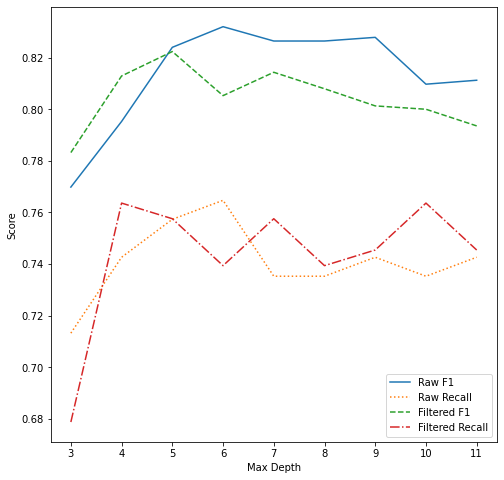

Raw Data Max F1: 0.8319999999999999
Raw Data Max Recall: 0.7647058823529411
Filtered Data Max F1: 0.8223684210526315
Filtered Data Max Recall: 0.7636363636363637


In [41]:
# --- 第 5 部分 ---
# 優化決策樹
plt.figure(figsize = (8, 8))

# 原始訓練資料
raw_f1 = []
raw_recall = []
range_ = [x for x in range(3,12)]
for max_d in range_:
    lr = DecisionTreeClassifier(max_depth = max_d)
    lr.fit(x_train, y_train)

    predictions = lr.predict(x_test)
    raw_f1.append(metrics.f1_score(y_test, predictions))
    raw_recall.append(metrics.recall_score(y_test,predictions))

plt.plot(range_, raw_f1, label='Raw F1', linestyle = '-')
plt.plot(range_, raw_recall, label='Raw Recall', linestyle = ':')

# 過濾低相關性的資料
filter_f1 = []
filter_recall = []
for max_d in range_:
    lr = DecisionTreeClassifier(max_depth = max_d)
    lr.fit(x_train_f, y_train_f)

    predictions = lr.predict(x_test_f)
    filter_f1.append(metrics.f1_score(y_test_f, predictions))
    filter_recall.append(metrics.recall_score(y_test_f,predictions))

plt.plot(range_, filter_f1, label='Filtered F1', linestyle = '--')
plt.plot(range_, filter_recall, label='Filtered Recall', linestyle = '-.')

plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Score')
plt.show()

print("Raw Data Max F1:", max(raw_f1))
print("Raw Data Max Recall:", max(raw_recall))
print("Filtered Data Max F1:", max(filter_f1))
print("Filtered Data Max Recall:", max(filter_recall))

# 進行集成，評估原始訓練資料和過濾低相關性的資料集成的效能

In [43]:
# --- 第 6 部分 ---
# 進行集成
base_classifiers = [('DT', DecisionTreeClassifier(max_depth = 10)),
                    ('NB', GaussianNB()),
                    ('LR', LogisticRegression(solver = 'liblinear'))]


# 原始訓練資料
ensemble = VotingClassifier(base_classifiers)
ensemble.fit(x_train, y_train)
print('原始訓練資料:')
print('Voting f1', metrics.f1_score(y_test, ensemble.predict(x_test)))
print('Voting recall', metrics.recall_score(y_test, ensemble.predict(x_test)))


# 過濾低相關性的資料
ensemble = VotingClassifier(base_classifiers)
ensemble.fit(x_train_f, y_train_f)
print('過濾低相關性的資料:')
print('Voting f1', metrics.f1_score(y_test_f, ensemble.predict(x_test_f)))
print('Voting recall', metrics.recall_score(y_test_f, ensemble.predict(x_test_f)))

原始訓練資料:
Voting f1 0.8217054263565892
Voting recall 0.7794117647058824
過濾低相關性的資料:
Voting f1 0.8178913738019169
Voting recall 0.7757575757575758


# 進行集成，另添加另外2顆決策樹(最大深度分別為6和7)，評估原始訓練資料和過濾低相關性的資料集成的效能

In [44]:
# --- 第 7 部分 ---
# 增加基學習器
base_classifiers = [('DT1', DecisionTreeClassifier(max_depth = 10)),
                    ('DT2', DecisionTreeClassifier(max_depth = 7)),
                    ('DT3', DecisionTreeClassifier(max_depth = 6)),
                    ('NB', GaussianNB()),
                    ('LR', LogisticRegression(solver = 'liblinear'))]

# 原始訓練資料
ensemble = VotingClassifier(base_classifiers)
ensemble.fit(x_train, y_train)
print('原始訓練資料:')
print('Voting f1', metrics.f1_score(y_test, ensemble.predict(x_test)))
print('Voting recall', metrics.recall_score(y_test, ensemble.predict(x_test)))

# 過濾低相關性的資料
ensemble = VotingClassifier(base_classifiers)
ensemble.fit(x_train_f, y_train_f)
print('過濾低相關性的資料:')
print('Voting f1', metrics.f1_score(y_test_f, ensemble.predict(x_test_f)))
print('Voting recall', metrics.recall_score(y_test_f, ensemble.predict(x_test_f)))

原始訓練資料:
Voting f1 0.8387096774193549
Voting recall 0.7647058823529411
過濾低相關性的資料:
Voting f1 0.8246753246753246
Voting recall 0.7696969696969697
